# Text with Sentiment


### In this lesson, we will analyze the data in our Text column according to Emotions and train the model

<a href='https://www.kaggle.com/datasets/divu2001/text-with-sentiment/data' target=_blank>You can find the data file here</a>

<img src=https://www.psychologicalscience.org/redesign/wp-content/uploads/2018/04/PAFF_040918_emotionspectrum2-1024x622.jpg width='400'>

In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("emotion_dataset_raw.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df.shape

(34792, 2)

In [5]:
import seaborn as sns

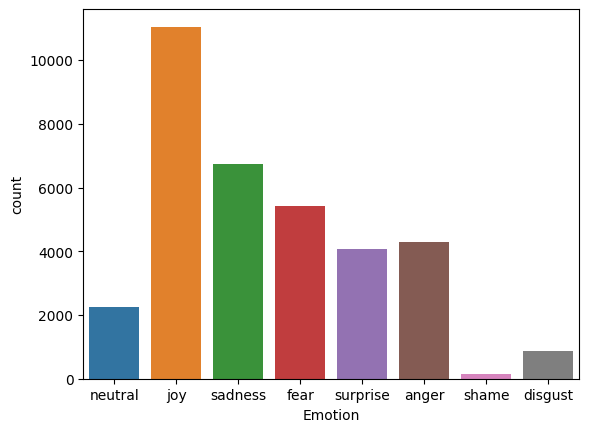

In [6]:
sns.countplot(x=df['Emotion']);

In [7]:
d={'neutral':0,'joy':1,'sadness':2,'fear':3,'surprise':4,'anger':5,'shame':6,'disgust':7}

In [8]:
df['Emotion']=df['Emotion'].map(d)

In [9]:
df.head()

,Emotion,Text
0,0,Why ?
1,1,Sage Act upgrade on my to do list for tommorow.
2,2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,1,Such an eye ! The true hazel eye-and so brill...
4,1,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [10]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','',regex= True)
df['Text']=df['Text'].str.replace('\n','')
df['Text']=df['Text'].str.replace('\d+','', regex = True)
df['Text']=df['Text'].str.replace('\r','', regex = True)

In [11]:
df['Text']

0                                                    why  
1           sage act upgrade on my to do list for tommorow
2        on the way to my homegirl baby funeral man i h...
3         such an eye  the true hazel eyeand so brillia...
4        iluvmiasantos ugh babe hugggzzz for u   babe n...
                               ...                        
34787    michelgw have you gift hope you like it its ha...
34788    the world didnt give it to meso the world most...
34789                              a man robbed me today  
34790        youu call it jealousy i call it of losing you
34791    i think about you baby and i dream about you a...
Name: Text, Length: 34792, dtype: object

In [12]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [14]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10)) 
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [15]:
neutral=df[df['Emotion']==0]['Text']
joy=df[df['Emotion']==1]['Text']
sadness=df[df['Emotion']==2]['Text']
fear=df[df['Emotion']==3]['Text']
surprise=df[df['Emotion']==4]['Text']
anger=df[df['Emotion']==5]['Text']
shame=df[df['Emotion']==6]['Text']
disgust=df[df['Emotion']==7]['Text']

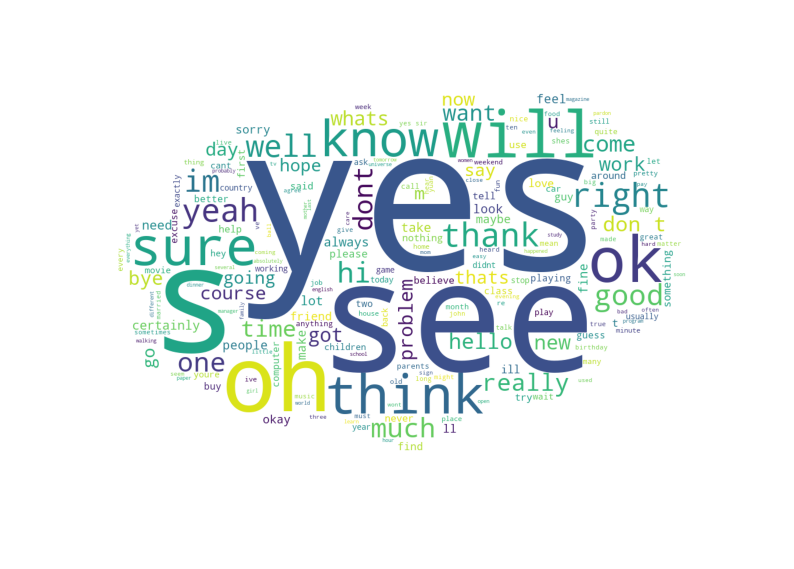

In [16]:
wc(neutral,'white')

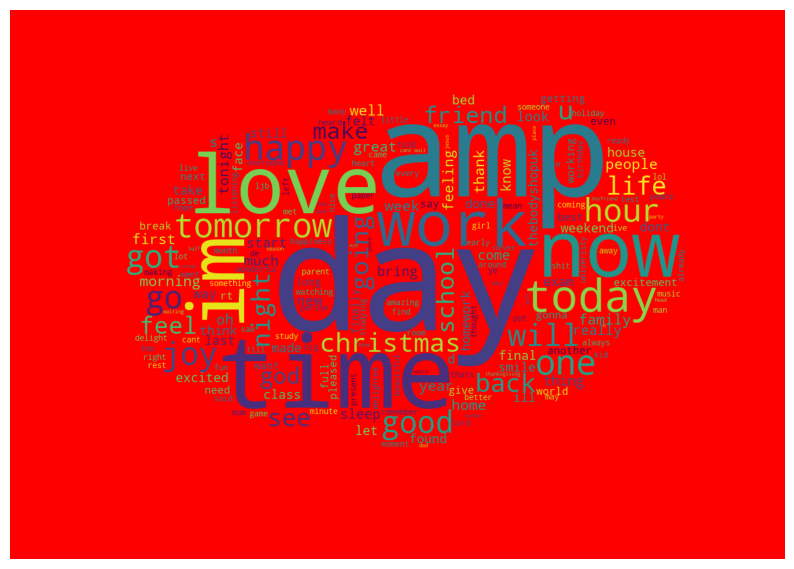

In [17]:
wc(joy,'red')

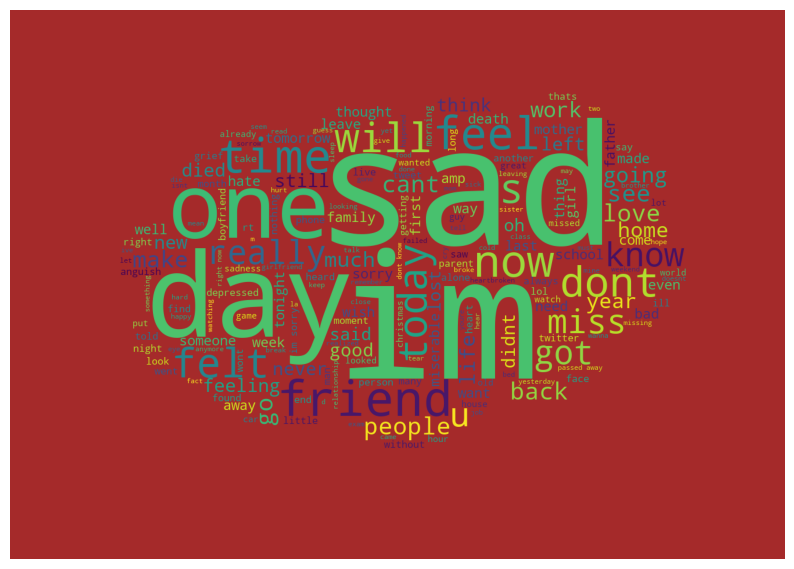

In [18]:
wc(sadness,'brown')

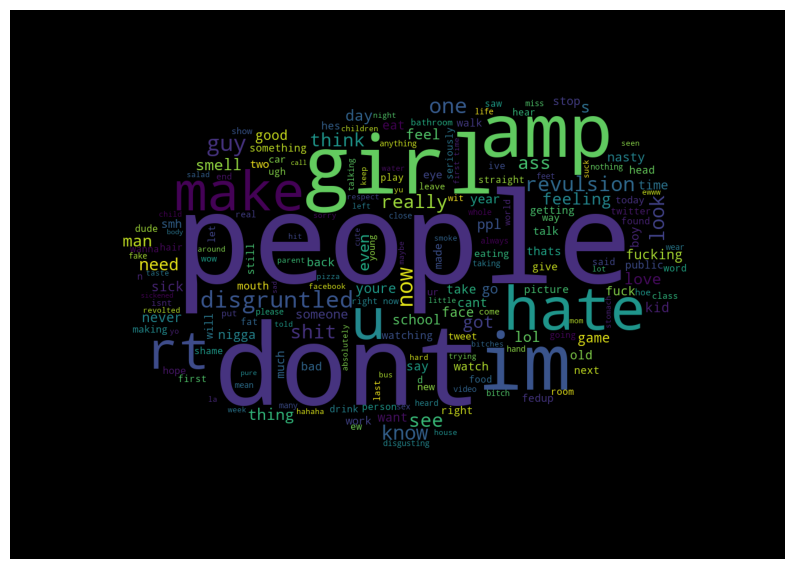

In [19]:
wc(disgust,'black')

In [20]:
x=df['Text']
y=df['Emotion']

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [24]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [25]:
vect = CountVectorizer(stop_words='english', max_features=5000,analyzer=lemmafn)

In [26]:
x=vect.fit_transform(x)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=42)

In [29]:
model=Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.7))
model.add(Dense(28,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8)) 
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=25,callbacks=[early_stopping],verbose=1)


Epoch 1/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2848 - loss: 1.8938 - val_accuracy: 0.4592 - val_loss: 1.4750
Epoch 2/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4691 - loss: 1.4468 - val_accuracy: 0.5385 - val_loss: 1.2918
Epoch 3/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5718 - loss: 1.2243 - val_accuracy: 0.6152 - val_loss: 1.2046
Epoch 4/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6422 - loss: 1.0779 - val_accuracy: 0.6181 - val_loss: 1.1799
Epoch 5/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6855 - loss: 0.9551 - val_accuracy: 0.6253 - val_loss: 1.1502
Epoch 6/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7197 - loss: 0.8535 - val_accuracy: 0.6310 - val_loss: 1.1598
Epoch 7/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7516 - loss: 0.7686 - val_accuracy: 0.6181 - val_loss: 1.1885
Epoch 8/25
979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7827 - loss: 0.6817 - val_accuracy: 0.

In [31]:
loss,accuracy=model.evaluate(x_test,y_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.6069 - loss: 1.2211


In [32]:
accuracy

0.611494243144989

In [33]:
tahmin=model.predict(x_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


In [34]:
model.save('Text.h5')

In [35]:
import matplotlib.pyplot as plt

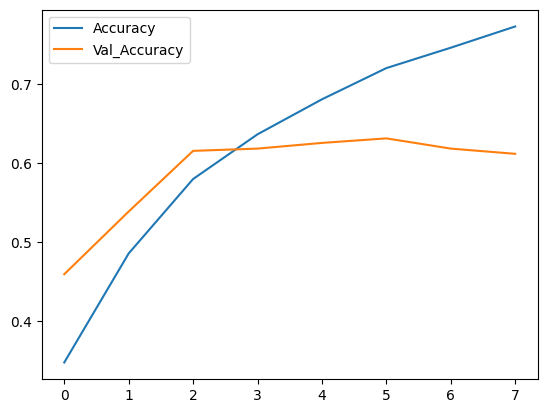

In [36]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [37]:
loss_f=pd.DataFrame(history.history)

<Axes: >

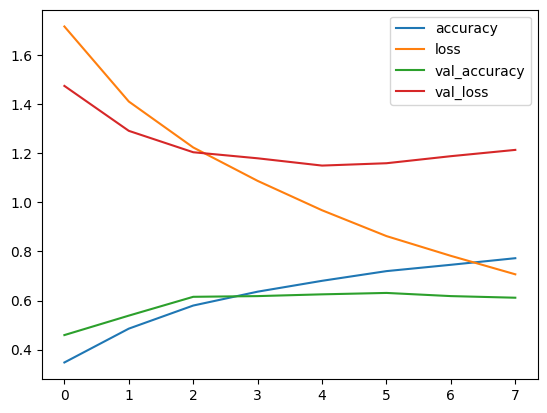

In [38]:
loss_f.plot()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [40]:
import numpy as np

In [41]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[167,  28,  43,   5,   5,   7,   0,   0],
       [ 18, 712, 180,  55, 105,  40,   0,   0],
       [ 12,  83, 436,  44,  36,  32,   0,   0],
       [  8,  38,  75, 383,  33,  23,   0,   0],
       [  3,  72,  58,  24, 191,  13,   0,   0],
       [ 14,  38,  95,  32,  12, 239,   0,   0],
       [  0,   0,   2,   1,   0,  14,   0,   0],
       [  1,  16,  34,  14,  11,  28,   0,   0]])

In [42]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

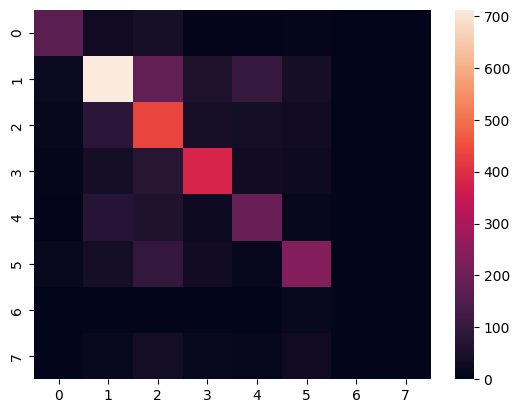

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [44]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       255
           1       0.72      0.64      0.68      1110
           2       0.47      0.68      0.56       643
           3       0.69      0.68      0.69       560
           4       0.49      0.53      0.51       361
           5       0.60      0.56      0.58       430
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00       104

    accuracy                           0.61      3480
   macro avg       0.46      0.47      0.46      3480
weighted avg       0.61      0.61      0.61      3480



# We achieved accuracy 0.61 in our model